<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Credit%20Card%20Fraud%20Detection%20Using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Credit Card Fraud Detection Using CNN**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import (
    BatchNormalization,
    Conv1D,
    Dense,
    Dropout,
    Flatten,
    MaxPool1D,
)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
print(tf.__version__)

2.8.0


In [4]:
data = pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
# Checking any Null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Here we have pretty inballanced data. 284315 False and only 492 True.
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Balance Data**

In [9]:
non_fraud = data[data["Class"] == 0]
fraud = data[data["Class"] == 1]

In [10]:
non_fraud, fraud

(            Time         V1         V2        V3        V4        V5  \
 0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
 1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
 2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
 3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
 4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
 ...          ...        ...        ...       ...       ...       ...   
 284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
 284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
 284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
 284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
 284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   
 
               V6        V7        V8        V9  ...       V21       V22  \
 0       0.462388  0.239599  0.098698  0.36378

In [11]:
# Selecting only 492 random non fraud data to balance our dataset.
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
# Merging both Fraud and Non Fraud dataset.
data = fraud.append(non_fraud, ignore_index=True)
data

C:\Users\sahug\AppData\Local\Temp\ipykernel_824\1000057745.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = fraud.append(non_fraud, ignore_index=True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,120552.0,-0.439381,0.280950,0.265679,-2.404968,0.907789,-1.521580,1.536227,-0.539386,0.539936,...,-0.157094,-0.155013,0.118075,0.035255,-0.657710,0.102160,0.169940,0.042064,49.51,0
980,153365.0,-1.439309,0.842362,1.117148,0.711862,0.191540,0.712391,0.061499,0.495878,-0.358983,...,0.228686,0.523958,-0.588902,0.056765,0.661773,-0.272787,-0.210364,-0.033673,70.00,0
981,64404.0,-0.297183,1.058359,0.826737,-0.329827,0.652412,0.012930,0.588521,0.147088,-0.578048,...,-0.289306,-0.789805,-0.173825,-0.888502,-0.034621,0.126782,0.240758,0.076170,2.88,0
982,2348.0,1.484592,-0.906182,0.590266,-1.245280,-1.656531,-1.200325,-0.845372,-0.314380,-1.975904,...,-0.180806,-0.107791,0.060848,0.708256,0.365217,-0.229479,0.033857,0.026905,20.00,0


In [13]:
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [14]:
x = data.drop("Class", axis=1)
y = data["Class"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

**Approach 1**

**Normalize Layer**

In [17]:
def normalizeDataset(ds):
    normalizer = tf.keras.layers.Normalization()    
    normalizer.adapt(ds)    
    return normalizer(ds)

**Model**

In [18]:
input_shape = x_train.shape[1], 1
x_train.shape, input_shape

((787, 30), (30, 1))

In [32]:
from keras import activations

def buildModel():
    inputs = keras.Input(shape=(input_shape))

    x = keras.layers.Conv1D(filters=32, kernel_size=2, activation=activations.relu)(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool1D(2)(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Conv1D(filters=64, kernel_size=2, activation=activations.relu)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool1D(2)(x)
    x = keras.layers.Dropout(0.5)(x)

    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(64, activation=activations.relu)(x)
    x = keras.layers.Dropout(0.5)(x)

    outputs = keras.layers.Dense(1,  activation=activations.sigmoid)(x)

    model = keras.Model(inputs=inputs, outputs=[outputs], name="conv1d")

    # Compile 
    loss = keras.losses.BinaryCrossentropy()
    optim = keras.optimizers.Adam(learning_rate=0.001)
    # metrics = [keras.metrics.SparseCategoricalAccuracy()]
    metrics = ["accuracy"]

    model.compile(loss=loss, optimizer=optim, metrics=metrics)

    model.summary()

    return model

buildModel()    

Model: "conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_8 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 14, 32)           0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 14, 32)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 13, 64)            4160 

**Classifier for Pipeline**

In [33]:
from scikeras.wrappers import KerasClassifier

kwargs = dict(
    model=buildModel(),
    epochs=10,
    batch_size = 128,
    verbose=1,
    random_state=0,
)

clf = KerasClassifier(model=buildModel(), epochs=10)

Model: "conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 conv1d_10 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_10 (Bat  (None, 29, 32)           128       
 chNormalization)                                                
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 14, 32)           0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 32)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 13, 64)            4160 

**Pipeline**

The class below is used to create a pipeline using your custom methods. Here we are using Normalization layer in the pipeline.

In [34]:
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

In [35]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
pipeline = Pipeline(steps=[
                ("Normalization", DataframeFunctionTransformer(normalizeDataset)),
                ("model", clf)

])
pipeline

Pipeline(steps=[('Normalization',
                 <__main__.DataframeFunctionTransformer object at 0x0000027A052256F0>),
                ('model',
                 KerasClassifier(epochs=10, model=<keras.engine.functional.Functional object at 0x0000027A05499ED0>))])

**Train**

In [36]:
pipeline.fit(x_train, y_train)

Epoch 1/10
25/25 [==============================] - 1s 4ms/step - loss: 0.5785 - accuracy: 0.7598
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8640
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3386 - accuracy: 0.8844
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2709 - accuracy: 0.8958
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2485 - accuracy: 0.9085
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.9161
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2222 - accuracy: 0.9161
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1696 - accuracy: 0.9276
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2007 - accuracy: 0.9238
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2193 - accuracy: 0.9301


Pipeline(steps=[('Normalization',
                 <__main__.DataframeFunctionTransformer object at 0x0000027A052256F0>),
                ('model',
                 KerasClassifier(epochs=10, model=<keras.engine.functional.Functional object at 0x0000027A05499ED0>))])

**Make Prediction**

In [24]:
y_preds = clf.predict(tf.cast(x_test, tf.float32))
y_preds[:10], y_preds[10:]

7/7 [==============================] - 0s 3ms/step


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

**Plot History**

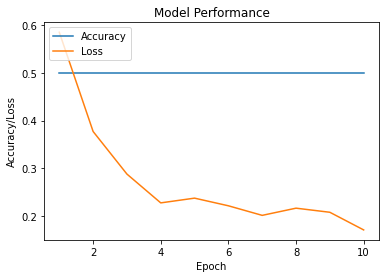

In [25]:
clf.history_.keys()

epoch_range = range(1, 11)

# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, clf.history_["sparse_categorical_accuracy"])
plt.plot(epoch_range, clf.history_["loss"])
plt.title("Model Performance")
plt.ylabel("Accuracy/Loss")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Loss"], loc="upper left")
plt.show()

**Approach 2**

In [26]:
# Mininzing the Variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
# Since CNN understands 3D data, converting our data to 3D.
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [28]:
x_train.shape, x_train[0].shape

((787, 30, 1), (30, 1))

In [29]:
model = Sequential()

# Layer 1
model.add(Conv1D(32, 2, activation="relu", input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

# Layer 2
model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

# Layer 3
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

# Layer 4
model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_6 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 14, 32)           0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_7 (Batc  (None, 13, 64)           2

c:\Users\sahug\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [30]:
history = model.fit(
    x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1
)

Epoch 1/10
25/25 [==============================] - 3s 43ms/step - loss: 0.6050 - accuracy: 0.7446 - val_loss: 0.5741 - val_accuracy: 0.8223
Epoch 2/10
25/25 [==============================] - 0s 12ms/step - loss: 0.3426 - accuracy: 0.8856 - val_loss: 0.5353 - val_accuracy: 0.8020
Epoch 3/10
25/25 [==============================] - 0s 10ms/step - loss: 0.3288 - accuracy: 0.8882 - val_loss: 0.5021 - val_accuracy: 0.8020
Epoch 4/10
25/25 [==============================] - 0s 10ms/step - loss: 0.2747 - accuracy: 0.8945 - val_loss: 0.4648 - val_accuracy: 0.7970
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.2616 - accuracy: 0.9161 - val_loss: 0.4359 - val_accuracy: 0.8223
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.2394 - accuracy: 0.9212 - val_loss: 0.3995 - val_accuracy: 0.8426
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 0.2138 - accuracy: 0.9149 - val_loss: 0.3746 - val_accuracy: 0.8528
Epoch 8/10
25/25

**Plot**

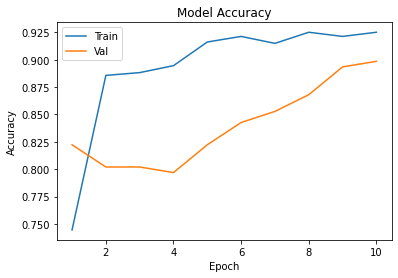

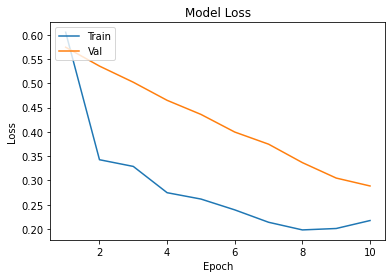

In [31]:
epoch_range = range(1, 11)

# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()